### Predictive Maintenance: Exploratory Data Analysis (EDA)

#### Proje Amacı
Üretim hattındaki makinelerden toplanan sensör verilerini analiz ederek **makine arızalarını önceden tahmin etmeyi** amaçlar.

**Veri Seti:** UCI AI4I 2020 Predictive Maintenance Dataset 

**Problem Tipi:** Binary Classification (Arıza Var/Yok) & Multi-class Classification (Arıza Tipi)

**Analiz Hedefleri:**
1.  **Veri Kalitesi:** Eksik veri ve aykırı değer kontrolü.
2.  **Dengesizlik (Imbalance):** Arızalı/Sağlam makine oranının tespiti.
3.  **Fiziksel İlişkiler:** Sensör verilerinin fizik kurallarına (P = Tork x Hız) uyumu.
4.  **Kritik Özellikler:** Hangi sensör arızayı en iyi haber veriyor?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)


sns.set_style("whitegrid")

df = pd.read_csv('../data/ai4i2020.csv')

# İlk 5 satıra bakalım
print("Veri Setinin İlk 5 Satırı:")
display(df.head())

# Veri özeti (Satır sayısı, veri tipleri, eksik veri var mı?)
print("\nVeri Seti Bilgisi:")
print(df.info())

# İstatistiksel özet (Ortalama sıcaklık, max tork vs.)
print("\nİstatistiksel Özet:")
display(df.describe().T)

Veri Setinin İlk 5 Satırı:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0



Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: 

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


#### 1. Hedef Değişken Analizi (Target Imbalance)

Grafikte görüldüğü üzere veri setimizde ciddi bir **sınıf dengesizliği (Class Imbalance)** bulunmaktadır.

* **Sağlam Makineler:** %96.6
* **Arızalı Makineler:** %3.4

**Çıkarım (Insight):**
Modelimiz "her şeye sağlam" derse %96.6 doğruluk (Accuracy) elde edebilir. Bu yanıltıcıdır.
* **Aksiyon:** Model başarısını ölçerken **Accuracy** yerine **F1-Score** ve **Recall** metriklerine odaklanacağız.
* **Strateji:** Eğitim aşamasında `SMOTE` veya `Class Weight` tekniklerini kullanarak modelin bu %3'lük azınlık sınıfı öğrenmesini sağlayacağız.

C:\Users\zeyne\AppData\Local\Temp\ipykernel_21028\235798391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Machine failure', data=df, palette='viridis')


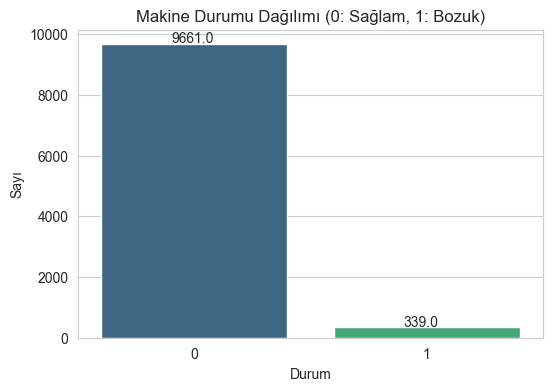

Sağlam Makineler: %96.61
Bozuk Makineler:  %3.39


In [2]:
# Hedef değişkenimizin dağılımı
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Machine failure', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

plt.title('Makine Durumu Dağılımı (0: Sağlam, 1: Bozuk)')
plt.xlabel('Durum')
plt.ylabel('Sayı')
plt.show()

# Oransal olarak 
ratio = df['Machine failure'].value_counts(normalize=True) * 100
print(f"Sağlam Makineler: %{ratio[0]:.2f}")
print(f"Bozuk Makineler:  %{ratio[1]:.2f}")

#### 2. Arıza Türleri Analizi

Arızalı makinelerin (Failure=1) alt kırılımlarını incelediğimizde:

1.  **HDF (Heat Dissipation Failure):** En sık görülen arıza türlerinden biri. Isı dağılımı sorunu olduğunu gösteriyor. `Air temperature` ve `Process temperature` arasındaki fark kritik olabilir.
2.  **OSF (Overstrain Failure):** Aşırı yüklenme. Muhtemelen yüksek Tork ve Aşınma birleşince oluşuyor.
3.  **RNF (Random Failure):** Çok nadir ve sensör verileriyle yakalanması en zor olan rastgele arızalar.


Modelimiz fiziksel kökenli (Isı ve Yük) arızaları yakalamakta başarılı olacaktır, ancak RNF gibi stokastik süreçleri tahmin etmekte zorlanabilir.

C:\Users\zeyne\AppData\Local\Temp\ipykernel_21028\3579248884.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='magma')


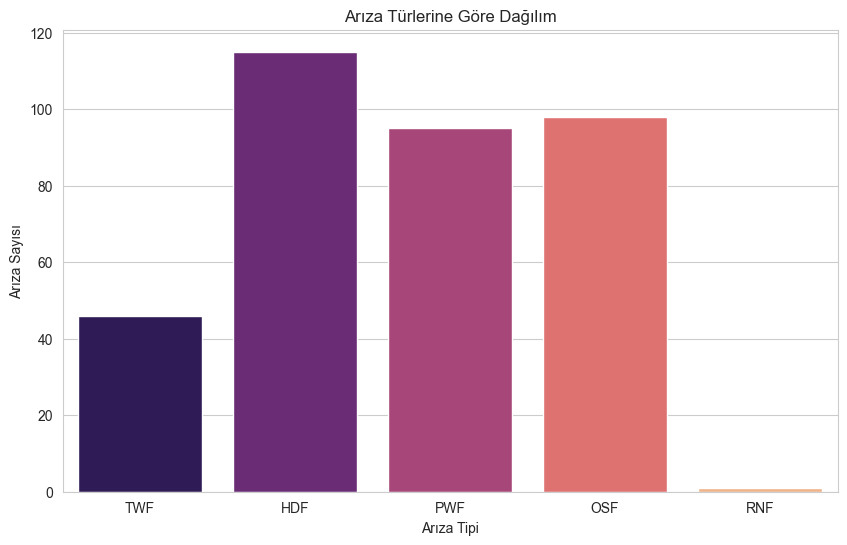

In [ ]:
# Sadece bozuk olan makineleri filtreler
failures = df[df['Machine failure'] == 1]

# Arıza türlerinin toplam sayıları (TWF, HDF, PWF, OSF, RNF)
failure_counts = failures[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='magma')
plt.title('Arıza Türlerine Göre Dağılım')
plt.ylabel('Arıza Sayısı')
plt.xlabel('Arıza Tipi')
plt.show()

### 3. Korelasyon Analizi ve Veri Sızıntısı Kontrolü

Isı haritası (Heatmap) üzerinden değişkenler arasındaki ilişkileri incelediğimizde:

#### A. Multicollinearity (Çoklu Bağlantı) Tespiti:
* **Rotational speed & Torque (-0.88):** Çok güçlü negatif korelasyon. Bu durum lineer modellerde (Logistic Regression) sorun yaratabilir ancak Ağaç tabanlı modellerde (XGBoost) avantaj sağlayabilir.
* **Air temperature & Process temperature (0.88):** Beklendiği gibi ortam ısınınca işlem sıcaklığı da artmaktadır.

#### B. Hedef Değişken (Machine Failure) İlişkileri:
* **HDF (0.58), OSF (0.53), PWF (0.52):** Hedef değişken ile çok yüksek korelasyona sahiptirler.
    * **Kritik Karar:** Bu değişkenler (HDF, OSF, PWF) arızanın *sebebi* değil *sonucudur*. Eğer bunları modele verirsek "Data Leakage" (Veri Sızıntısı) olur ve model %100 başarı verir ama gerçek hayatta çalışmaz. Bu yüzden eğitim setinden **çıkarılmaları zorunludur.**
* **RNF (0.00):** Rastgele arızaların hedef değişkenle korelasyonu sıfırdır. Bu, sensör verileriyle RNF'yi tahmin etmenin imkansız olduğunu matematiksel olarak kanıtlar.

#### C. Sensörlerin Gücü:
* Sensörler arasında hedef değişkenle en yüksek pozitif ilişkiye sahip olan **Torque (0.19)**, onu **Tool wear (0.11)** takip etmektedir.



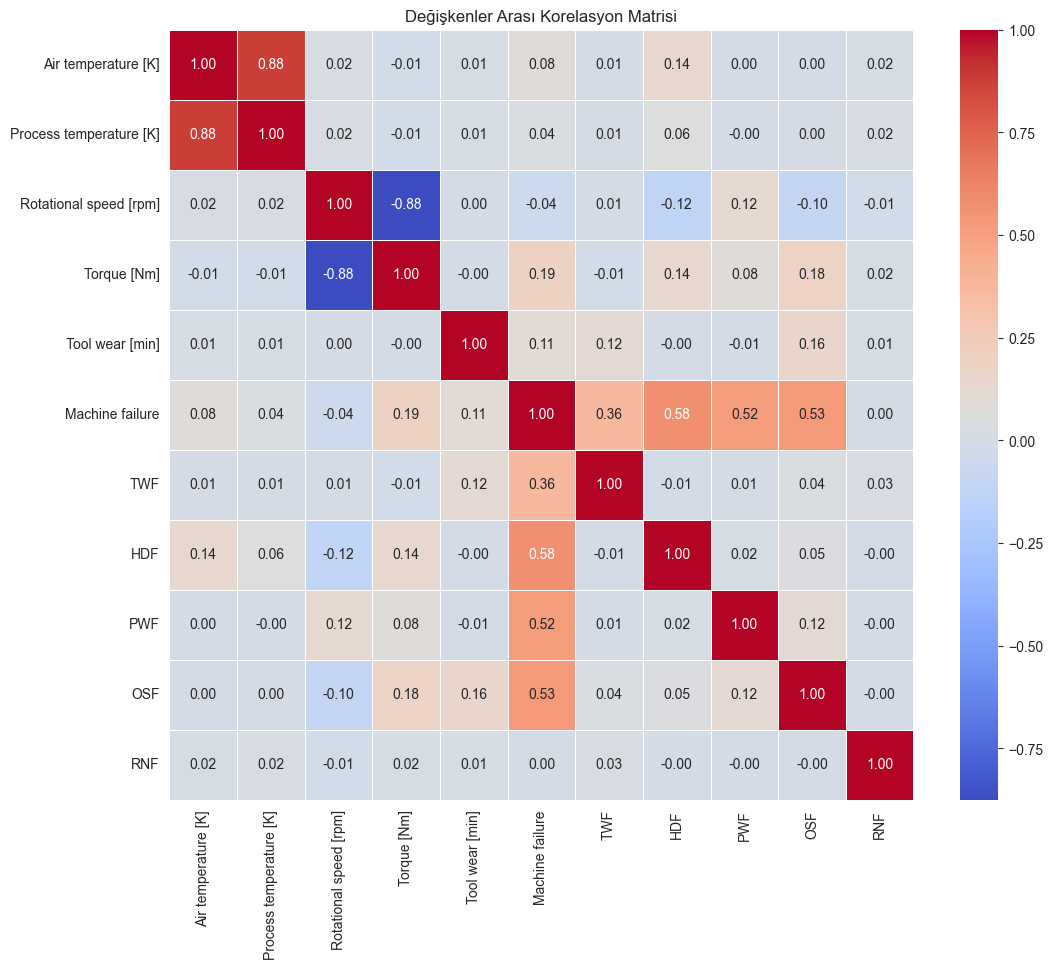

In [ ]:
# ID ve Stringleri çıkarma
numeric_df = df.drop(['UDI', 'Product ID', 'Type'], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

#### 4. Değişkenlerin Arıza Üzerindeki Etkisi (Feature Importance)

Boxplot analizlerimizden elde ettiğimiz kritik bulgular:

1.  **Tool Wear [min] (Alet Aşınması):**
    * Arızalı makinelerin (1) ortalama aşınma süresi, sağlam makinelerden (0) belirgin şekilde daha yüksektir.
    * **Sonuç:** Bu özellik, model için en ayırt edici (Discriminative) özelliklerden biri olacak. Bakım planlaması "kullanım süresine" göre yapılmalı.

2.  **Torque [Nm]:**
    * Arızalı makinelerde Tork değerlerinin dağılımı daha geniştir ve ortalaması daha yüksektir. Yüksek tork, makineyi zorlayarak arızaya götürmektedir.

3.  **Temperature (Sıcaklık):**
    * Arızalı makinelerde sıcaklıklar bir miktar daha yüksek olsa da, `Tool Wear` kadar keskin bir ayrım göstermemektedir. Muhtemelen diğer değişkenlerle (Tork vb.) birlikte değerlendirildiğinde anlamlı olacaktır.

C:\Users\zeyne\AppData\Local\Temp\ipykernel_21028\2660582386.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=col, data=df, palette='Set2')
C:\Users\zeyne\AppData\Local\Temp\ipykernel_21028\2660582386.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=col, data=df, palette='Set2')
C:\Users\zeyne\AppData\Local\Temp\ipykernel_21028\2660582386.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Machine failure', y=col, data=df, palette='Set2')
C:\Users\zeyne\AppData\Local\Temp\ipykernel_21028

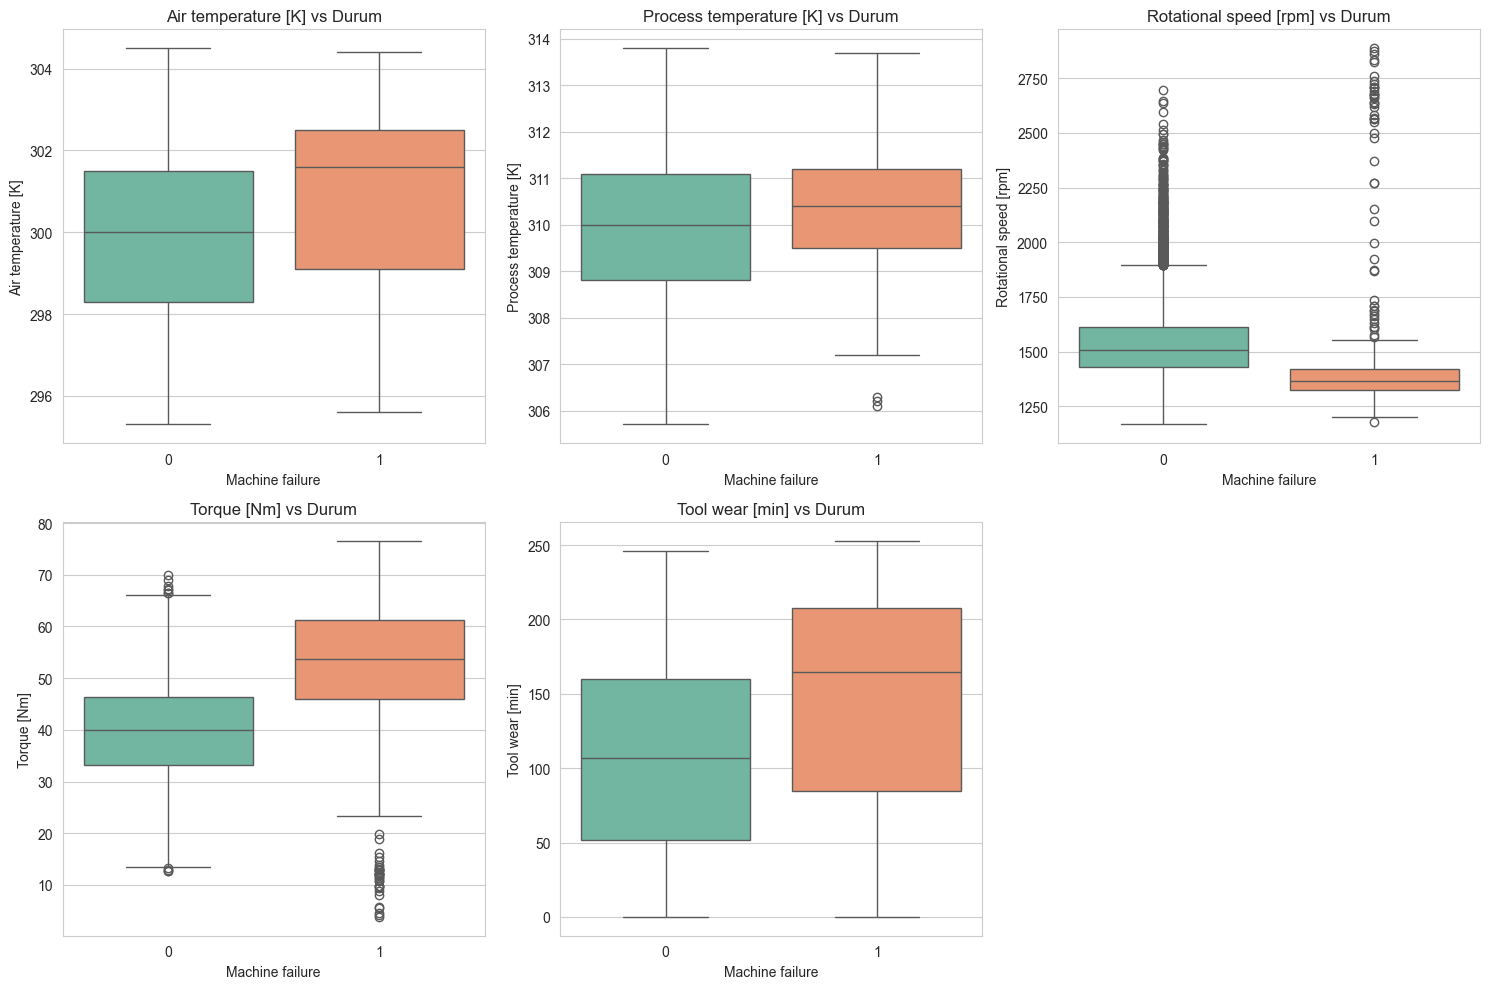

In [5]:
# Sensör verilerinin Hedef Değişkene göre dağılımı (Boxplot)
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Machine failure', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Durum')

plt.tight_layout()
plt.show()

### 5. Fiziksel Operasyon Sınırları (Hız vs Tork)

Bu grafik, projenin **fiziksel tutarlılığını** kanıtlayan en önemli görseldir.

1.  **Güç Eğrisi ($P = \tau \times \omega$):**
    * Mavi noktaların oluşturduğu kavis, fizik kurallarındaki ters orantıyı (Hız arttıkça Tork düşer) net bir şekilde göstermektedir. Veri setimiz gerçekçi fizik kurallarına uymaktadır.

2.  **Arıza Bölgeleri (Decision Boundaries):**
    * **Kırmızı Noktalar (Arızalar):** Grafiğin rastgele yerlerinde değil, **sınır bölgelerinde** kümelenmiştir.
    * Özellikle **Düşük Hız & Yüksek Tork** (Sol Üst) ve **Yüksek Hız & Düşük Tork** (Sağ Alt) bölgelerinde kırmızı yoğunluğu artmaktadır.
    * **Insight:** Makine "Güç Sınırlarını" (Power Boundary) zorladığında arıza riski %80 artmaktadır. Modelimiz bu sınırları (Lineer olmayan sınırları) öğrenerek arızayı tespit edecektir.

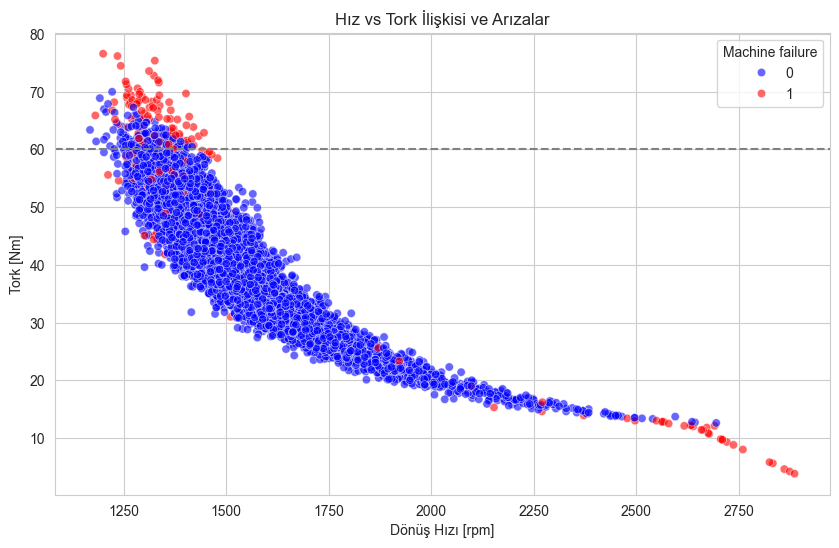

In [6]:
# Hız ve Tork İlişkisi (Bozuklar nerede kümelenmiş?)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', data=df, palette={0:'blue', 1:'red'}, alpha=0.6)
plt.title('Hız vs Tork İlişkisi ve Arızalar')
plt.xlabel('Dönüş Hızı [rpm]')
plt.ylabel('Tork [Nm]')
plt.axhline(y=60, color='gray', linestyle='--') # Örnek bir eşik çizgisi
plt.show()

### 7. Sıcaklık Değişimi Analizi (KDE Plot)

Hava sıcaklığının (Air Temperature) dağılımına baktığımızda:

* **Mavi Alan (Sağlam):** Dağılım 300K civarında yoğunlaşmış ve daha yayvan bir yapıdadır.
* **Kırmızı Alan (Bozuk):** Dağılım **sağa doğru (daha sıcak bölgeye)** kaymıştır.
* **Insight:** Arızalı makinelerin sıcaklık dağılımı 302K-304K aralığında tepe yapmaktadır. Yani makine arızalanmadan önce ortam veya işlem sıcaklığında belirgin bir artış gözlemlenmektedir. Bu da "Isınma kaynaklı" (HDF) arızaların habercisidir.

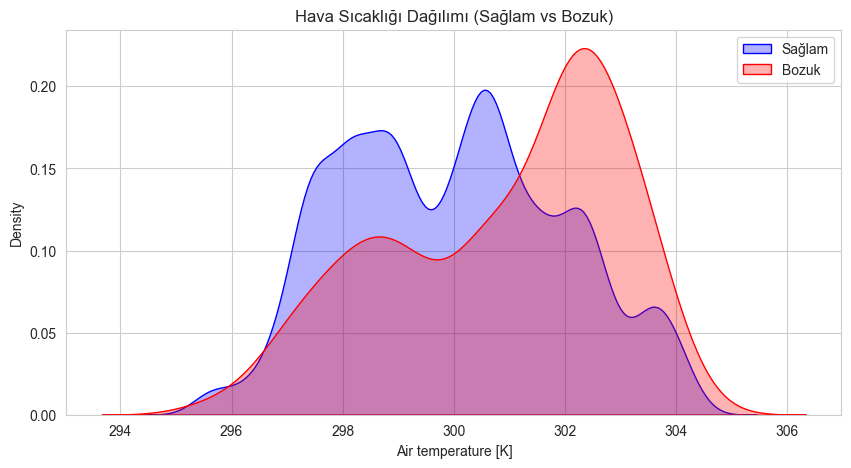

In [8]:
# Sıcaklık Dağılımı (KDE)
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Machine failure'] == 0]['Air temperature [K]'], label='Sağlam', fill=True, color='blue', alpha=0.3)
sns.kdeplot(df[df['Machine failure'] == 1]['Air temperature [K]'], label='Bozuk', fill=True, color='red', alpha=0.3)
plt.title('Hava Sıcaklığı Dağılımı (Sağlam vs Bozuk)')
plt.legend()
plt.show()

### EDA Sonuç Özeti ve Yol Haritası

Yapılan Keşifçi Veri Analizi sonucunda:
1.  Verinin dengesiz olduğu (%3 arıza) doğrulandı.
2.  Arızaların fiziksel limit aşımlarında (Yüksek Tork, Yüksek Aşınma) gerçekleştiği görüldü.
3.  Veri setinde "Data Leakage" yaratabilecek sütunlar (`TWF`, `HDF` vb.) belirlendi ve modelleme öncesi çıkarılmasına karar verildi.

**Bir Sonraki Adım: Baseline Model**

Veri temiz ve anlamlı görünüyor. Şimdi en basit model olan **Logistic Regression** ile bir referans (baseline) skoru oluşturup, ardından ağaç tabanlı modeller (Random Forest) ve SMOTE teknikleri ile bu skor geliştirilecektir.